<b> <font size = 5> World University Rankings

<b> <font size = 2> 
This project conducts exploratory data analysis (EDA) and builds machine learning models to analyse and predict world university rankings. The datasets used contain information about various universities, including their rankings, scores, locations, and other relevant factors.
    

    Dataset Variables:
    
rank: Rank of the University according to QS(2023)
    
institution: University name
    
location code: Abbreviated location
    
location: Location of the university 
    
ar score: Academic Reputation score
    
er score: Employer Reputation score
    
fsr score: score of the Faculty to Student ratio 
    
cpf score: Citations per Faulty score
    
ifr score: score of the Iternational Faculty ratio
    
isr score: score of the International Student ratio
    
   

<b> <font size = 4> Importing Libraries

In [1]:
# Analysis
import pandas as pd
import numpy as np
import re
import math

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
color_pal = sns.color_palette()


# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Reporting
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

#ignore warnings
import warnings
warnings.simplefilter(action='ignore')

<b> <font size = 4> Custom Functions

In [2]:
def calculate_score_scaled(df, ar_weight=0.4, er_weight=0.1, fsr_weight=0.2, cpf_weight=0.2, ifr_weight=0.05, isr_weight=0.05):
    """
    Calculates the score_scaled column based on the weighted sum of the ar, er, fsr, cpf, ifr, and isr columns.
    """
    # Calculate the weighted sum of the columns
    weighted_sum = (df['ar score'] * ar_weight) + \
                   (df['er score'] * er_weight) + \
                   (df['fsr score'] * fsr_weight) + \
                   (df['cpf score'] * cpf_weight) + \
                   (df['ifr score'] * ifr_weight) + \
                   (df['isr score'] * isr_weight)
    
    # Add the weighted sum as a new column
    df['score_scaled'] = weighted_sum
    
    return df


In [3]:
# Function to define the rank categories and their corresponding ranges
def assign_rank_category(rank):
    if math.isnan(rank):
        return None
    rank = int(rank)
    lower_bound = ((rank - 1) // 25) * 25 + 1
    upper_bound = lower_bound + 24
    return f'{lower_bound}-{upper_bound}'

<b><font size =4>Importing Datasets

Importing two datasets, one from a csv file and the other using webscapping

In [4]:
#import dataset from csv file
rankings=pd.read_csv('Downloads/datasets/2023QSWorldUniversityRankings.csv')

In [5]:
rankings.head()

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54.0,90.0,109.0,96.1,58.0,100.0,3.0,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60.0,96.3,70.0,99.5,6.0,100.0,9.0,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74.0,60.3,235.0,96.3,55.0,100.0,2.0,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101.0,98.4,54.0,99.9,3.0,100.0,7.0,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228.0,66.9,212.0,100.0,1.0,100.0,1.0,97.6


In [6]:
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1422 non-null   int64  
 1   institution    1422 non-null   object 
 2   location code  1422 non-null   object 
 3   location       1422 non-null   object 
 4   ar score       1422 non-null   float64
 5   ar rank        1422 non-null   int64  
 6   er score       1421 non-null   float64
 7   er rank        1422 non-null   int64  
 8   fsr score      1420 non-null   float64
 9   fsr rank       1422 non-null   int64  
 10  cpf score      1417 non-null   float64
 11  cpf rank       1422 non-null   int64  
 12  ifr score      1324 non-null   float64
 13  ifr rank       1324 non-null   float64
 14  isr score      1365 non-null   float64
 15  isr rank       1365 non-null   float64
 16  irn score      1409 non-null   float64
 17  irn rank       1409 non-null   float64
 18  ger scor

In [7]:
rankings.shape

(1422, 21)

In [8]:
#importing dataframe using webscrapping


# URL of the page to be scraped
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_spending_on_education_(%25_of_GDP)'

# Use pandas to read the HTML table on the page
table_list = pd.read_html(url)

# The table we want is the first one on the page
exp = table_list[0]

# Print the first 5 rows of the DataFrame
print(exp.head())




  Country or subnational area Expenditure on education(% of GDP)  Year Source
0            Marshall Islands                               15.8  2019    [1]
1                        Cuba                               12.9  2012    [1]
2                  Micronesia                               12.5  2015    [1]
3                    Kiribati                               12.0  2001    [1]
4                  Somaliland                                9.6  2021    [1]


This gives a dataframe containing country/subnational area and the percentage of GDP the governement spent on education in the most recent year of information available

In [9]:
#saving data as csv file
exp.to_csv('/Users/niamh/desktop/exp_dataset.csv', index=False)


In [10]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Country or subnational area         198 non-null    object
 1   Expenditure on education(% of GDP)  198 non-null    object
 2   Year                                198 non-null    object
 3   Source                              198 non-null    object
dtypes: object(4)
memory usage: 6.3+ KB


In [11]:
exp.shape

(198, 4)

<b> <font size = 4> Cleaning Data

In [12]:
#removing unnecessary columns from rankings data
rankings.drop(['ar rank', 'er rank','fsr rank','ifr rank','cpf rank', 'isr rank','irn rank','irn score','ger score','ger rank','score scaled'], axis=1, inplace=True)

The removed columns are not needed for analysis/prediction purposes.

In [13]:
rankings.columns

Index(['Rank', 'institution', 'location code', 'location', 'ar score',
       'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score'],
      dtype='object')

In [14]:
#removing unneccessary columns from exp data
exp.drop('Source', axis=1, inplace=True)

In [15]:
#renaming columns in exp dataframe to make it easier to reference them
exp.rename(columns={'Country or subnational area': 'location', 'Expenditure on education(% of GDP)': 'exp_%_gdp'}, inplace=True)

#using a dictionary specifying the old column names as keys and the new column names as values

In [16]:
exp.columns

Index(['location', 'exp_%_gdp', 'Year'], dtype='object')

In [17]:
#find missing values
rankings.isnull().sum()

Rank              0
institution       0
location code     0
location          0
ar score          0
er score          1
fsr score         2
cpf score         5
ifr score        98
isr score        57
dtype: int64

In [18]:
#identifying rows with missing values

# count missing values in each row
missing_values = rankings.isna().sum(axis=1)

# filter for rows with multiple missing values
threshold = 1 # specify the threshold for number of missing values
rows_with_missing_values = rankings[missing_values > threshold]

print(rows_with_missing_values)


      Rank                                        institution location code  \
389    390  Pakistan Institute of Engineering and Applied ...            PK   
517    518                          Universidad de Costa Rica            CR   
523    524          Beijing University of Chemical Technology            CN   
549    550                               University of Madras            IN   
620    621       Nanjing University of Science and Technology            CN   
689    690  Universidad Nacional del Centro de la Provinci...            AR   
693    694                  University of Alabama, Birmingham            US   
728    729                   Universidad Central de Venezuela            VE   
745    746                        University of South Bohemia            CZ   
821    822          China University of Mining and Technology            CN   
920    921            Universidad de Oriente Santiago de Cuba            CU   
926    927                   Universidad Nacional de

In [19]:
#removing rows with missing values
rankings=rankings.dropna()

Removing these rows instead of replacing the missing values as replacing them with values such as 0, the median or the mean of the column would affect prediction of overall score and rank later

In [20]:
rankings.isnull().sum()

Rank             0
institution      0
location code    0
location         0
ar score         0
er score         0
fsr score        0
cpf score        0
ifr score        0
isr score        0
dtype: int64

In [21]:
#find duplicates
rankings.duplicated().sum()

0

In [22]:
rankings.shape

(1317, 10)

105 rows with missing values removed

In [23]:
#repeating process of finding null values and duplicates with exp data
exp.isnull().sum()

location     0
exp_%_gdp    0
Year         0
dtype: int64

In [24]:
exp.duplicated().sum()

0

In [25]:
# replace 'n.a.' values with NaN
exp['exp_%_gdp'] = exp['exp_%_gdp'].replace('n.a.', np.nan)

# convert column to float
exp['exp_%_gdp'] = exp['exp_%_gdp'].astype(float)

#convert Year column to int (Not using datetime as it is not needed in this case)
exp['Year'] = exp['Year'].replace('n.a.', np.nan)
exp['Year']=exp['Year'].astype(float)


In [26]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   198 non-null    object 
 1   exp_%_gdp  192 non-null    float64
 2   Year       192 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [27]:
exp.describe()

,exp_%_gdp,Year
count,192.000000,192.000000
mean,4.551250,2014.645833
std,2.072696,4.292887
min,0.600000,1989.000000
25%,3.200000,2014.000000
50%,4.200000,2016.000000
75%,5.400000,2017.000000
max,15.800000,2021.000000


Observation: Oldest data from 1989, newest from 2021

In [28]:
#drop Year column as it is not necessary
exp.drop('Year', axis=1, inplace=True)
print(exp.head())

           location  exp_%_gdp
0  Marshall Islands       15.8
1              Cuba       12.9
2        Micronesia       12.5
3          Kiribati       12.0
4        Somaliland        9.6


In [29]:
# Calculate and add the score_scaled column calling one of the custom functions
rankings = calculate_score_scaled(rankings)
# Display the updated dataframe with the new score_scaled column
print(rankings.head())


   Rank                                   institution location code  \
0     1  Massachusetts Institute of Technology (MIT)             US   
1     2                       University of Cambridge            UK   
2     3                           Stanford University            US   
3     4                          University of Oxford            UK   
4     5                            Harvard University            US   

         location  ar score  er score  fsr score  cpf score  ifr score  \
0   United States     100.0     100.0      100.0      100.0      100.0   
1  United Kingdom     100.0     100.0      100.0       92.3      100.0   
2   United States     100.0     100.0      100.0       99.9       99.8   
3  United Kingdom     100.0     100.0      100.0       90.0       98.8   
4   United States     100.0     100.0       99.4      100.0       76.9   

   isr score  score_scaled  
0       90.0        99.500  
1       96.3        98.275  
2       60.3        97.985  
3       98.4

Score scaled is the university's combined score comprising of the total of the other variables weighted as follows:
- Academic reputation: 40%
- Employer reputation: 10%
- Citations per Faculty: 20%
- Faculty Student Ratio: 20%
- International Student Ratio: 5%
- International Faculty Ratio: 5%


    

<b> <font size = 4> Merging Dataframes

Before merging the dataframes, I am checking to see if the way locations are specified is the same in both dataframes. Grouping by location first to avoid having to view multiple rows of the same location in rankings dataframe

In [30]:
# Group the data by location
grouped_data_rankings = rankings.groupby('location')

# Aggregate the columns by taking the mean
agg_data_rankings = grouped_data_rankings.mean()

# View the aggregated data
print(agg_data_rankings.head())

                   Rank   ar score   er score  fsr score  cpf score  \
location                                                              
Argentina    832.687500  17.756250  20.800000  39.362500   1.875000   
Armenia      950.000000   5.850000   6.550000  29.800000   1.550000   
Australia    416.157895  30.421053  29.986842  12.378947  59.173684   
Austria      401.250000  22.375000  17.637500  44.825000  22.900000   
Azerbaijan  1022.000000   7.550000   3.550000  24.650000   1.200000   

            ifr score  isr score  score_scaled  
location                                        
Argentina   14.187500  19.312500     19.105000  
Armenia      7.300000  38.100000     11.535000  
Australia   80.973684  72.984211     37.175526  
Austria     84.325000  70.987500     32.024375  
Azerbaijan   3.350000   2.150000      8.820000  


In [31]:
#resetting index to make location a column
agg_data_rankings= agg_data_rankings.reset_index()

In [32]:
#converting certain columns to string data types
agg_data_rankings['location'] = agg_data_rankings['location'].astype(str)

In [33]:
# create a regex pattern to match locations starting with 'united'
pattern = re.compile('^united', flags=re.IGNORECASE)

# filter the DataFrame using the regex pattern
united_locations_exp = exp[exp['location'].str.match(pattern)]

# print the resulting DataFrame
print(united_locations_exp)


                 location  exp_%_gdp
64          United States        5.0
113        United Kingdom        3.9
188  United Arab Emirates        1.3


In [34]:
#same process with rankings data
united_locations_rankings=agg_data_rankings[agg_data_rankings['location'].str.match(pattern)]
print(united_locations_rankings)

                location        Rank   ar score   er score  fsr score  \
90  United Arab Emirates  574.909091  13.090909  18.890909  26.900000   
91        United Kingdom  516.077778  27.297778  30.366667  25.521111   
92         United States  640.154639  25.663402  23.464948  33.319588   

    cpf score   ifr score  isr score  score_scaled  
90  10.763636  100.000000  80.772727     23.696818  
91  34.110000   76.321111  78.028889     33.599500  
92  36.162887   27.792268  23.562371     29.076082  


Locations values starting with 'United' are specified the same way

In [35]:
# search for locations with 3 words using regex
pattern = r'\b\w+\s+\w+\s+\w+\b'
matches = agg_data_rankings['location'].str.findall(pattern)

# print the matches
for match in matches:
    if len(match) > 0:
        print(match[0])

Hong Kong SAR
Islamic Republic of
Syrian Arab Republic
United Arab Emirates


In [36]:
pattern = r'\b\w+\s+\w+\s+\w+\b'
matches = exp['location'].str.findall(pattern)

# print the matches
for match in matches:
    if len(match) > 0:
        print(match[0])

Saint Vincent and
State of Palestine
Sao Tome and
Trinidad and Tobago
Saint Kitts and
Antigua and Barbuda
Democratic Republic of
United Arab Emirates
Central African Republic
Bosnia and Herzegovina
Papua New Guinea


In [37]:
#check for Hong Kong as it is a major location for univeristies
# select rows with "Hong Kong" or "China" in the index
search_result_rankings = agg_data_rankings.loc[agg_data_rankings['location'].str.contains('Hong Kong|China')]

print(search_result_rankings)

search_result_exp=exp.loc[exp['location'].str.contains('Hong Kong|China')]
print(search_result_exp)

            location        Rank   ar score   er score  fsr score  cpf score  \
15  China (Mainland)  564.224138  19.781034  17.058621  31.748276  55.267241   
33     Hong Kong SAR  160.142857  59.200000  35.428571  63.457143  69.471429   

    ifr score  isr score  score_scaled  
15  18.962069  11.108621     28.524914  
33  99.714286  92.028571     63.395714  
      location  exp_%_gdp
109      China        4.0
139  Hong Kong        3.3


In [38]:
# replace values
rankings.replace('China (Mainland)', 'China', inplace=True)
rankings.replace('Hong Kong SAR', 'Hong Kong', inplace=True)

In [39]:
#merging rankings and exp
df = rankings.merge(exp, on="location")
print(df.head())

   Rank                                   institution location code  \
0     1  Massachusetts Institute of Technology (MIT)             US   
1     3                           Stanford University            US   
2     5                            Harvard University            US   
3     6  California Institute of Technology (Caltech)            US   
4    10                         University of Chicago            US   

        location  ar score  er score  fsr score  cpf score  ifr score  \
0  United States     100.0     100.0      100.0      100.0      100.0   
1  United States     100.0     100.0      100.0       99.9       99.8   
2  United States     100.0     100.0       99.4      100.0       76.9   
3  United States      96.5      87.1      100.0      100.0       99.8   
4  United States      99.2      92.2       92.9       86.8       81.6   

   isr score  score_scaled  exp_%_gdp  
0       90.0        99.500        5.0  
1       60.3        97.985        5.0  
2       66.9  

In [40]:
df.shape

(1280, 12)

37 rows of data where locations did not match removed

In [41]:
#sort values by 'rank'

In [42]:
df.sort_values('Rank', inplace=True)
print(df.head())

     Rank                                   institution location code  \
0       1  Massachusetts Institute of Technology (MIT)             US   
194     2                       University of Cambridge            UK   
1       3                           Stanford University            US   
195     4                          University of Oxford            UK   
2       5                            Harvard University            US   

           location  ar score  er score  fsr score  cpf score  ifr score  \
0     United States     100.0     100.0      100.0      100.0      100.0   
194  United Kingdom     100.0     100.0      100.0       92.3      100.0   
1     United States     100.0     100.0      100.0       99.9       99.8   
195  United Kingdom     100.0     100.0      100.0       90.0       98.8   
2     United States     100.0     100.0       99.4      100.0       76.9   

     isr score  score_scaled  exp_%_gdp  
0         90.0        99.500        5.0  
194       96.3      

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 0 to 1265
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1280 non-null   int64  
 1   institution    1280 non-null   object 
 2   location code  1280 non-null   object 
 3   location       1280 non-null   object 
 4   ar score       1280 non-null   float64
 5   er score       1280 non-null   float64
 6   fsr score      1280 non-null   float64
 7   cpf score      1280 non-null   float64
 8   ifr score      1280 non-null   float64
 9   isr score      1280 non-null   float64
 10  score_scaled   1280 non-null   float64
 11  exp_%_gdp      1280 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 130.0+ KB


<b><font size = 4> Exploratory Data Analysis

In [44]:
#show summary statistics for the data
df.describe()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,score_scaled,exp_%_gdp
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,683.589844,21.332422,21.753828,30.689766,25.157266,32.130312,27.478594,24.858203,4.579688
std,405.565908,23.457514,24.564422,28.473575,28.068296,34.364401,31.387501,19.772225,1.088770
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.820000,1.300000
25%,327.500000,5.875000,4.800000,8.500000,3.200000,4.800000,3.300000,10.730000,3.900000
50%,679.500000,11.700000,11.200000,18.800000,12.100000,13.900000,11.550000,18.460000,4.700000
75%,1030.250000,25.900000,29.225000,45.025000,41.200000,56.875000,42.725000,32.805000,5.100000
max,1422.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.500000,12.900000


Insights:
    - Lowest ranking university in this list is 1422nd but there are only 1280 universities listed. This is due to universities having NaN values for several varaibles and being removed during the preprocessing phase.
    - Altough all variables affecting score scaled have a max value of 100, the hgihest score scaled is 99.5, indictating that no university has a perfect score in all 6 variables.

In [45]:
# Access each row using an iterator to find the top 10 universities in the world in 2023
for index, row in df.sort_values('Rank').head(10).iterrows():
    print(row['Rank'], row['institution'])


1 Massachusetts Institute of Technology (MIT) 
2 University of Cambridge
3 Stanford University
4 University of Oxford
5 Harvard University
6 California Institute of Technology (Caltech)
7 Imperial College London
8 UCL
9 ETH Zurich - Swiss Federal Institute of Technology
10 University of Chicago


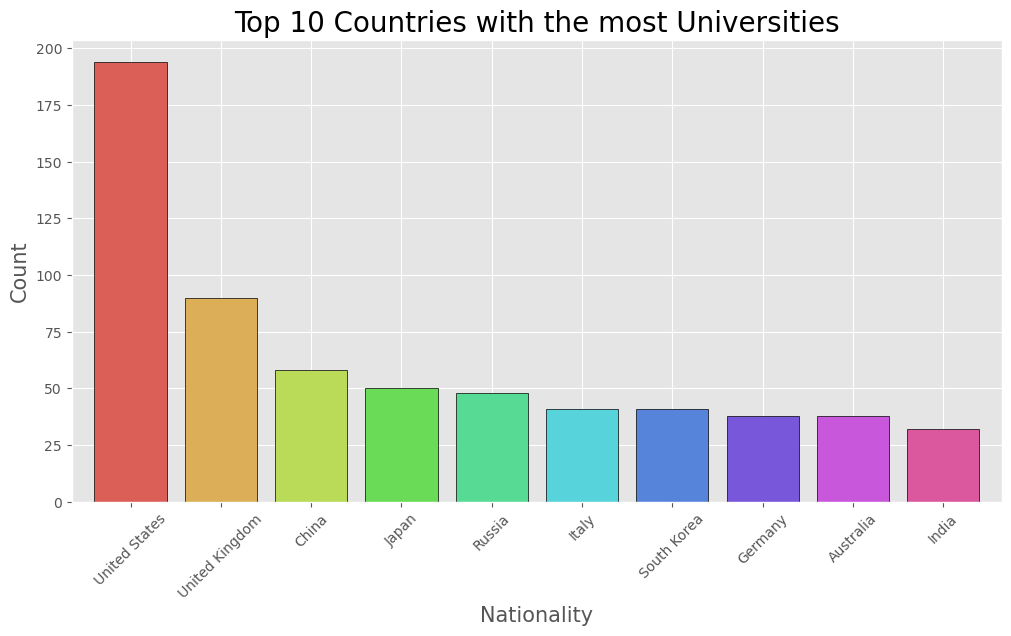

In [46]:
#distribution of top universities

plt.figure(figsize=(12, 6))

colours = sns.color_palette('hls', n_colors=10)

df['location'].value_counts().head(10).plot(
    kind='bar',
    color=colours,
    width=0.8,
    edgecolor='black'
)

plt.xlabel("Nationality", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Top 10 Countries with the most Universities", fontsize=20)

plt.xticks(rotation=45)

plt.show()

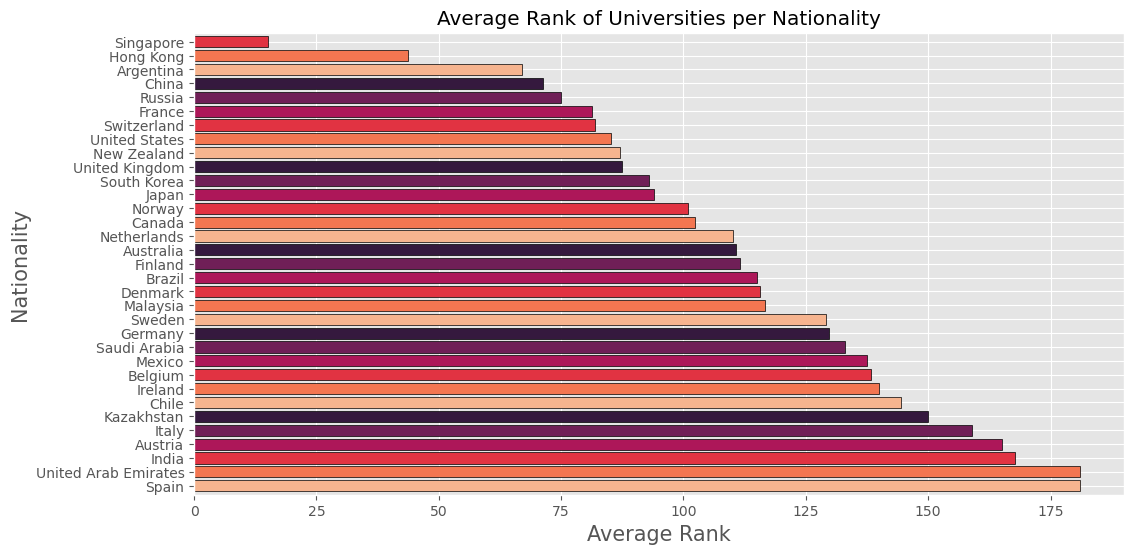

In [47]:
#average rank per nationality
plt.figure(figsize=(12, 6))

df_front_100 = df.loc[df['Rank'] <= 200]

colours2=sns.color_palette('rocket_r')

df_front_100.groupby('location')['Rank'].mean().sort_values(ascending=False).plot(
    kind='barh',
    color=colours2,
    width=0.8,
    edgecolor='black'
)

plt.xlabel("Average Rank", fontsize=15)
plt.ylabel("Nationality", fontsize=15)
plt.title("Average Rank of Universities per Nationality")

plt.show()

In [48]:
df[df['location'] == 'Singapore']['institution'].nunique()


3

Insight: Singapore have 3 universities and average rankings in the top 20. Singapore, on average, has the best ranking universties in the world.

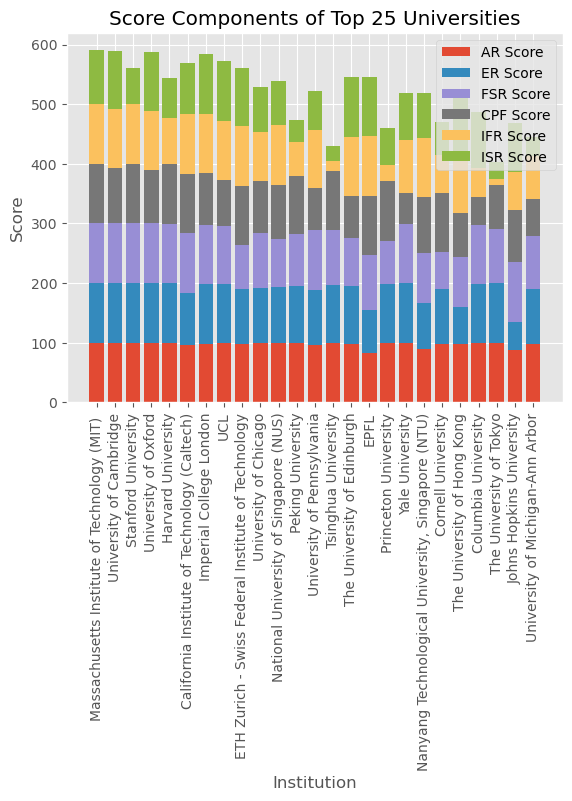

In [49]:
#stacked bar chart showing score components of top 25 universities
score_components = ['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']
top_25_df = df.head(25)  # Selecting the top 25 universities
institution_scores = top_25_df[score_components]

plt.bar(top_25_df['institution'], institution_scores['ar score'], label='AR Score')
plt.bar(top_25_df['institution'], institution_scores['er score'], bottom=institution_scores['ar score'], label='ER Score')
plt.bar(top_25_df['institution'], institution_scores['fsr score'], bottom=institution_scores['ar score'] + institution_scores['er score'], label='FSR Score')
plt.bar(top_25_df['institution'], institution_scores['cpf score'], bottom=institution_scores['ar score'] + institution_scores['er score'] + institution_scores['fsr score'], label='CPF Score')
plt.bar(top_25_df['institution'], institution_scores['ifr score'], bottom=institution_scores['ar score'] + institution_scores['er score'] + institution_scores['fsr score'] + institution_scores['cpf score'], label='IFR Score')
plt.bar(top_25_df['institution'], institution_scores['isr score'], bottom=institution_scores['ar score'] + institution_scores['er score'] + institution_scores['fsr score'] + institution_scores['cpf score'] + institution_scores['ifr score'], label='ISR Score')

plt.xlabel('Institution')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.title('Score Components of Top 25 Universities')
plt.legend()
plt.show()

This graph shows the totoal of the score components of the top ranking 25 universities in the world. It highlights the importance of the weighting for each componant in the calculation of the total score scaled, as evident by Tsinghua University, whose components add lower than the other universities such as EPFL,
Princeton University,
Yale University,
Nanyang Technological University, Singapore (NTU),
Cornell University.,
The University of Hong Kong, Columbia University, The University of Tokyo 
Johns Hopkins University and
University of Michigan-Ann Arbor, who rank lower than Tsinghya Yniversity but have a higher combined score without the weighting applied.

In [50]:
#show the correlation coefficieent between the different variables in the dataset
df.corr()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,score_scaled,exp_%_gdp
Rank,1.000000,-0.744319,-0.663757,-0.576561,-0.664404,-0.567704,-0.529161,-0.881712,-0.106414
ar score,-0.744319,1.000000,0.841351,0.378640,0.581159,0.405779,0.394565,0.919717,0.105884
er score,-0.663757,0.841351,1.000000,0.350992,0.441727,0.362844,0.363386,0.810383,0.019693
fsr score,-0.576561,0.378640,0.350992,1.000000,0.124234,0.172665,0.228332,0.579707,0.040599
cpf score,-0.664404,0.581159,0.441727,0.124234,1.000000,0.451712,0.369361,0.718939,0.124091
ifr score,-0.567704,0.405779,0.362844,0.172665,0.451712,1.000000,0.712023,0.559038,0.108447
isr score,-0.529161,0.394565,0.363386,0.228332,0.369361,0.712023,1.000000,0.544268,0.008345
score_scaled,-0.881712,0.919717,0.810383,0.579707,0.718939,0.559038,0.544268,1.000000,0.109705
exp_%_gdp,-0.106414,0.105884,0.019693,0.040599,0.124091,0.108447,0.008345,0.109705,1.000000


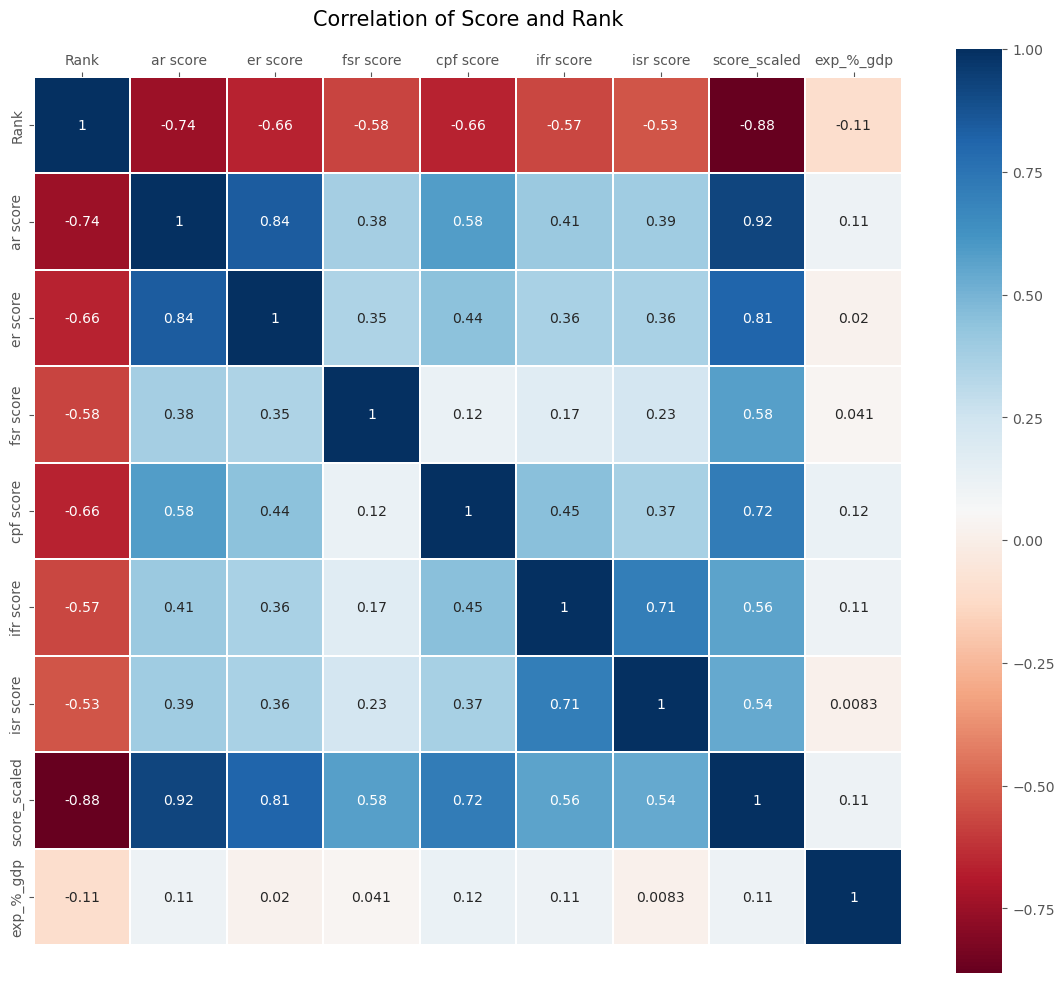

In [51]:
corr = df.corr()

plt.figure(figsize=(14, 12))

plt.title('Correlation of Score and Rank', y=1.05, size=15)

ax = sns.heatmap(
    data=corr,
    linewidths=0.1,
    vmax=1.0,
    cmap=plt.cm.RdBu,
    linecolor='white',
    annot=True,
    square=True
)

ax.xaxis.tick_top()

plt.show()

strongest correlation between score_scaled and ar_score

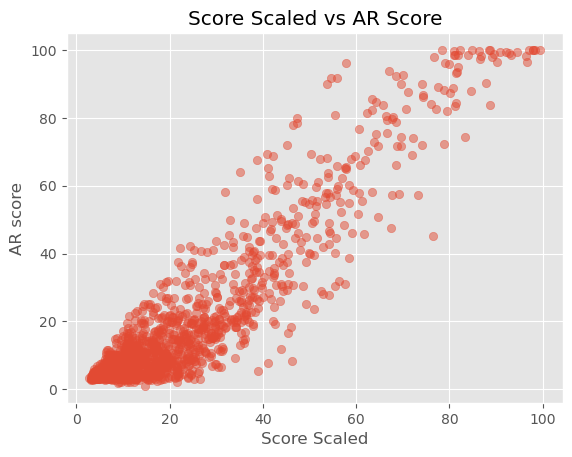

In [52]:
import matplotlib.pyplot as plt

plt.scatter(df['score_scaled'], df['ar score'], alpha=0.5)
plt.xlabel('Score Scaled')
plt.ylabel('AR score')
plt.title('Score Scaled vs AR Score')
plt.show()


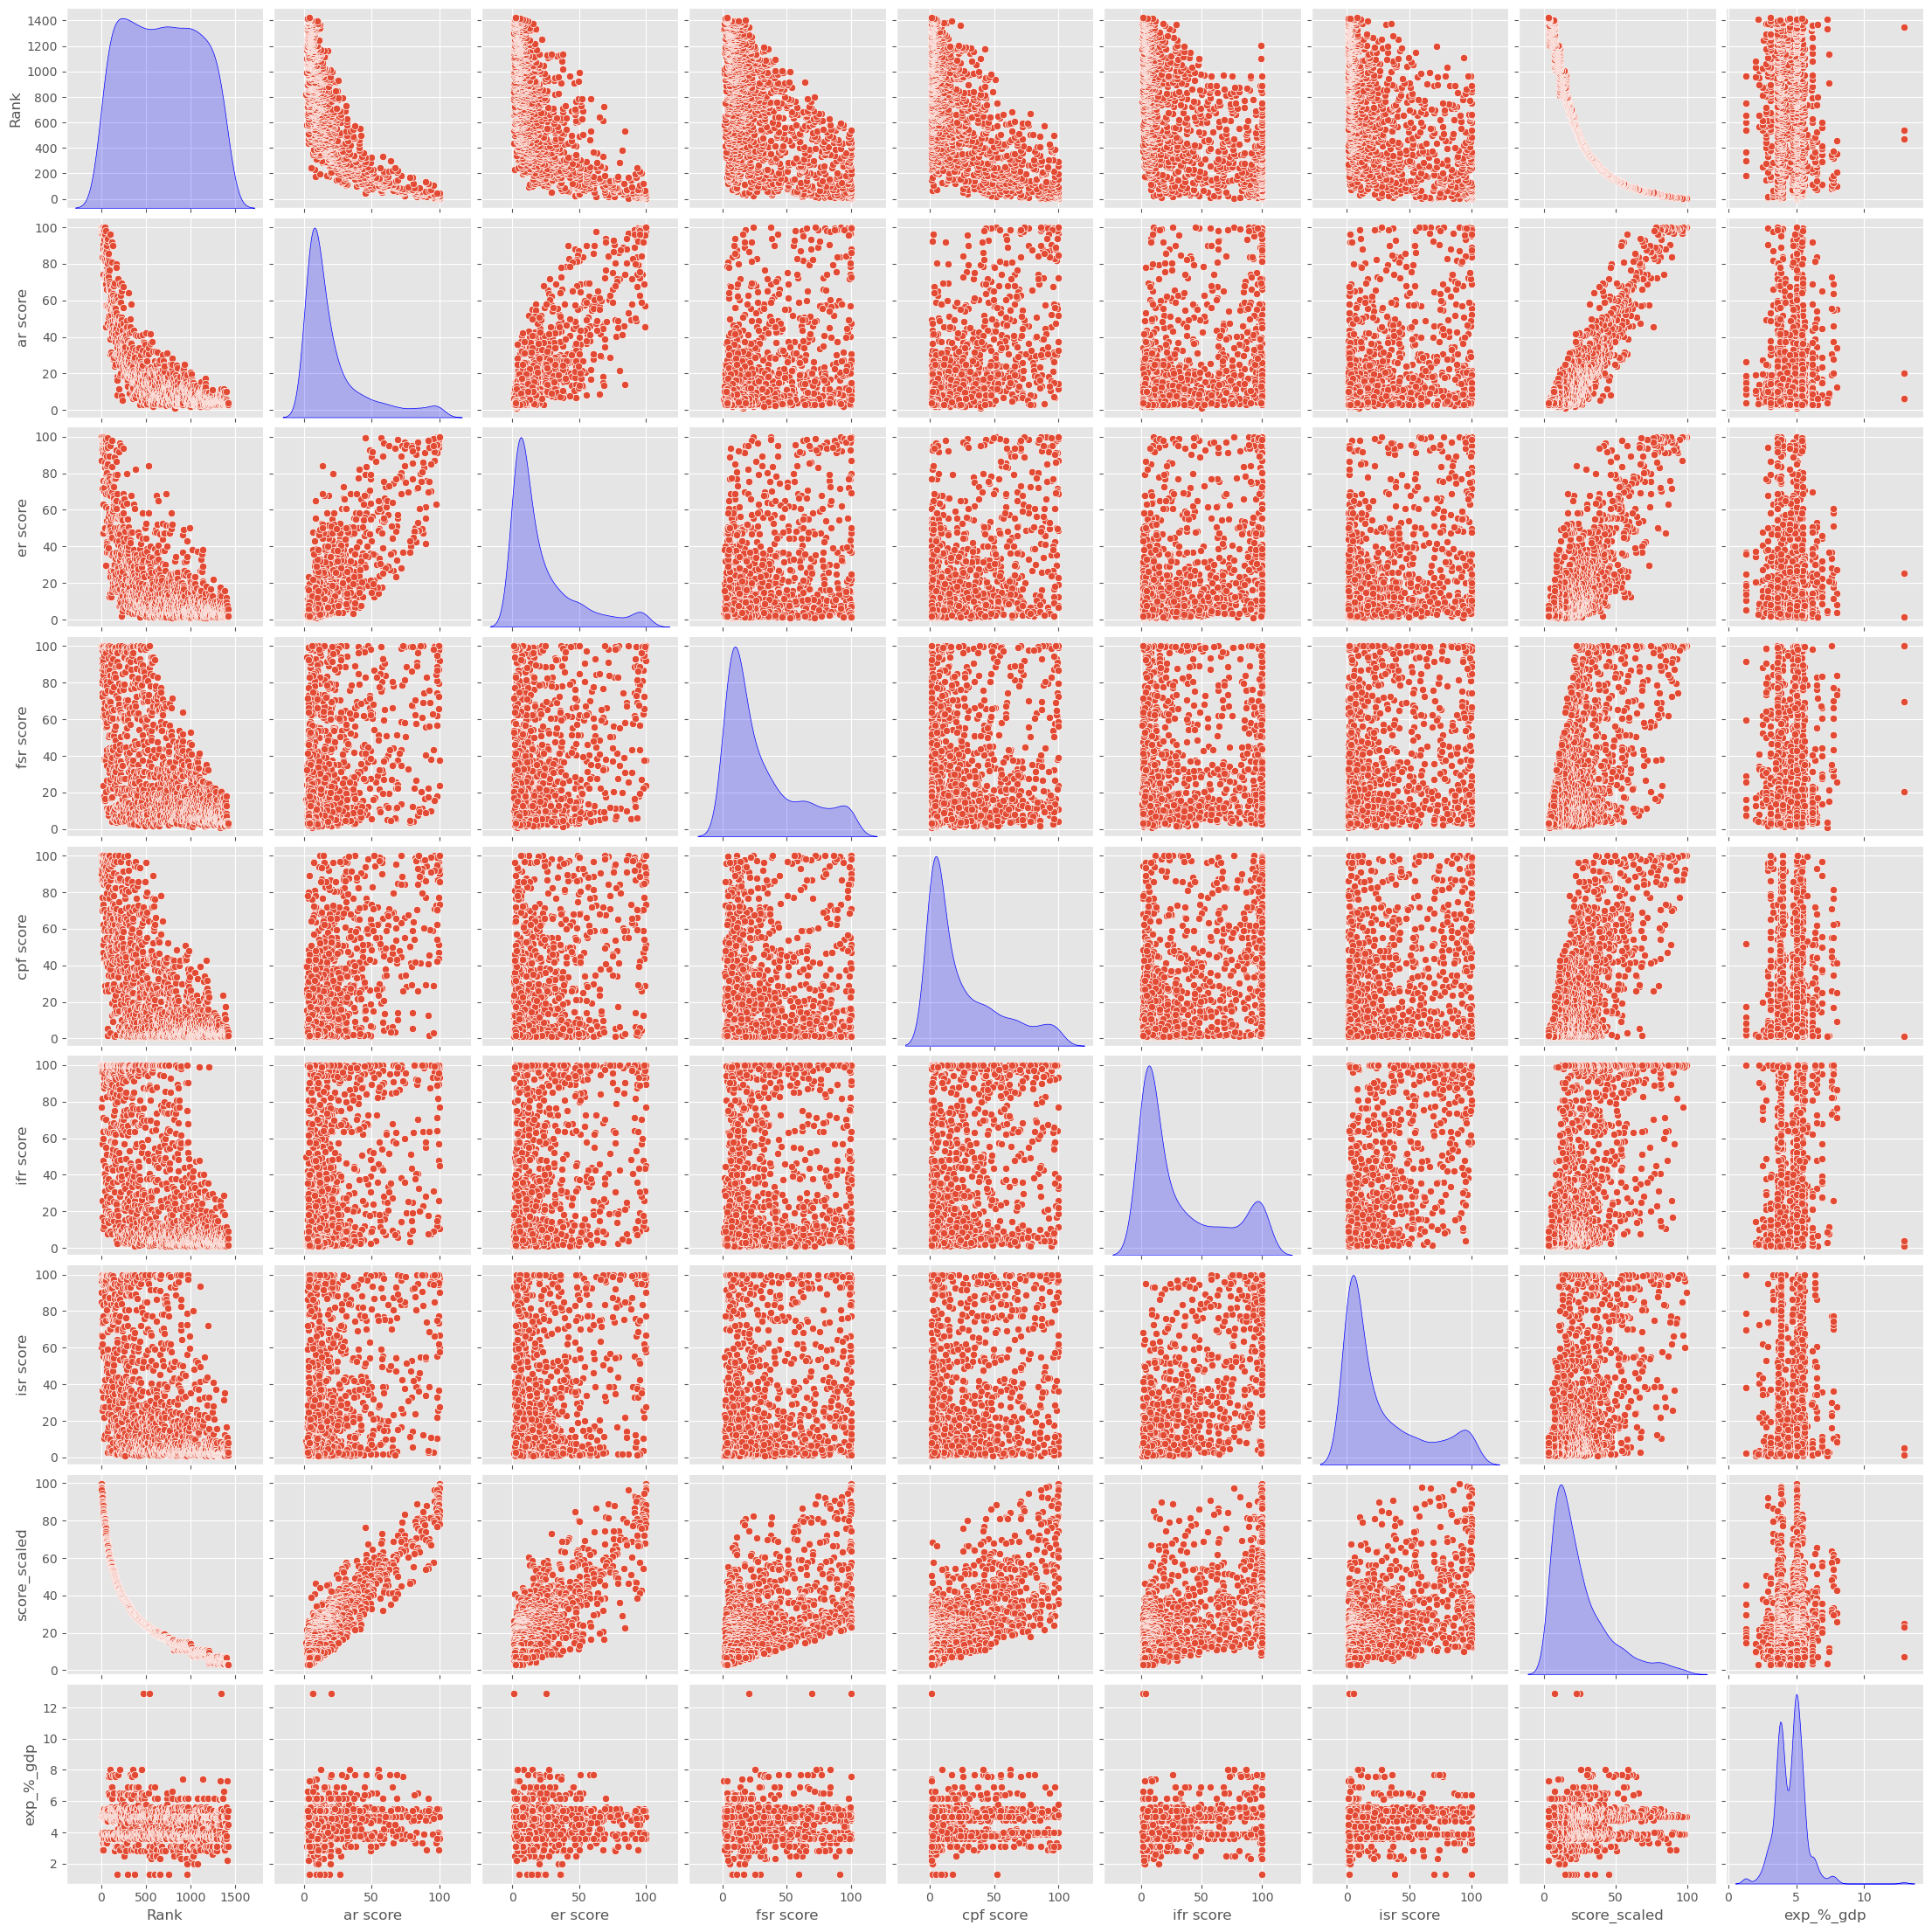

In [53]:
sns.pairplot(df,diag_kind='kde', diag_kws={'color':'blue'})

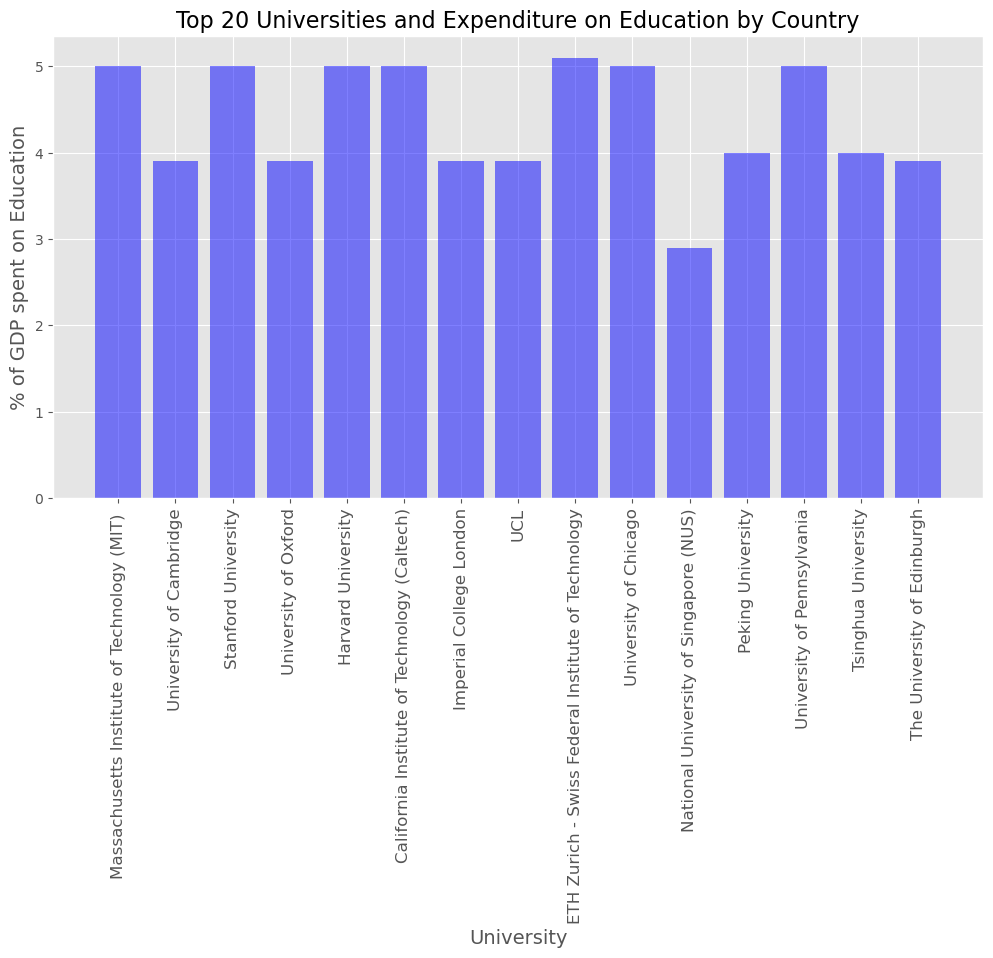

In [54]:
# Plot a bar chart showing the top 20 universities and expenditure on education in the country that university is in
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(df['institution'].head(15), df['exp_%_gdp'].head(15), color='blue', alpha=0.5)
ax.set_xticklabels(df['institution'], rotation=90, fontsize=12)
plt.xlabel('University', fontsize=14)
plt.ylabel('% of GDP spent on Education', fontsize=14)
plt.title('Top 20 Universities and Expenditure on Education by Country', fontsize=16)
plt.show()

In [55]:
#using numpy to calulate mean GDP% spent on education in countries with the top 20 universities

# Select the first 20 rows of the "exp_%_gdp" column and save as a numpy array
exp_gdp_top20 = np.array(df.iloc[:20]['exp_%_gdp'])
print(np.mean(exp_gdp_top20))

4.425


In [56]:
exp_gdp_overall=np.array(df['exp_%_gdp'])
print(np.mean(exp_gdp_overall))

4.5796875


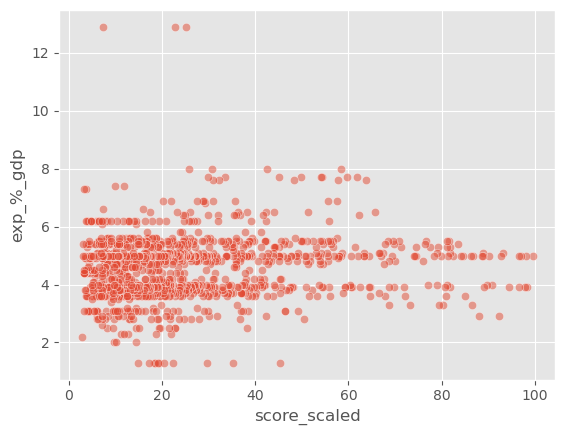

In [57]:
# Explore relationship between scores and "exp_%_gdp"
sns.scatterplot(data=df, x="score_scaled", y="exp_%_gdp", alpha=0.5)
plt.show()

Insight: percentage of GDP spent on education in countries with the top 20 universities is in line with mean % spent on education in other nationalties with universities in the top 500. No clear indication that % of GDP spent on education has significant impact on the ranking of the universities.

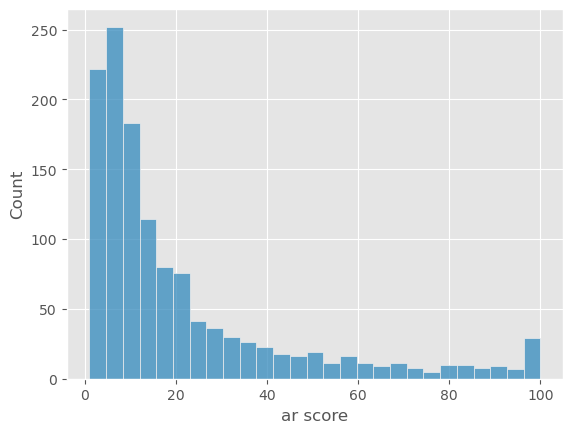

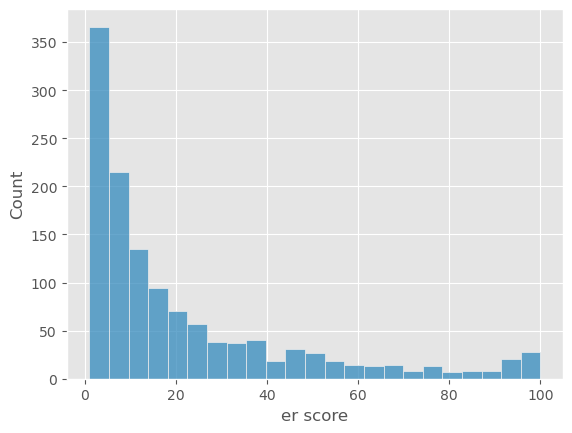

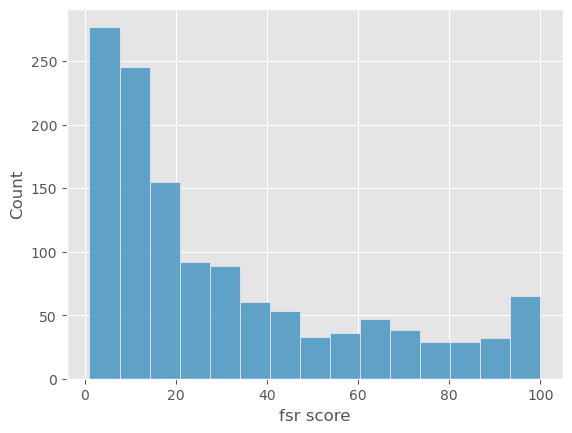

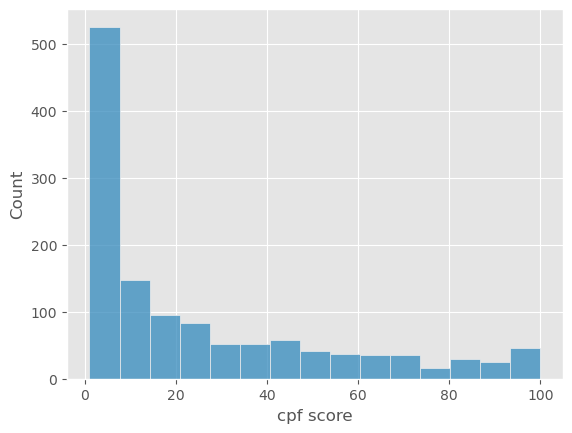

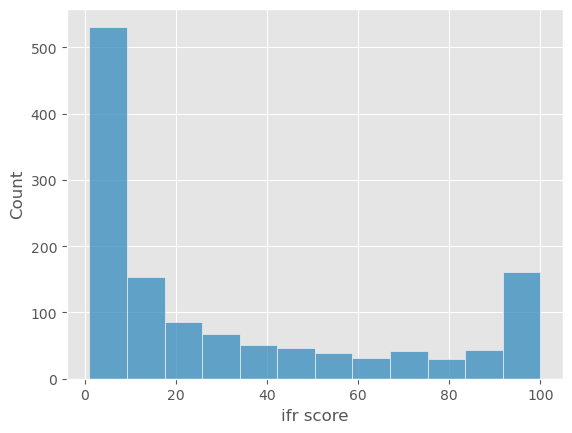

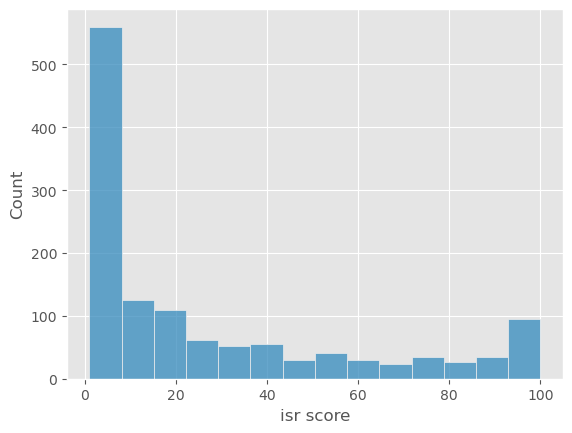

In [58]:
# Visualize distribution of scores
scores = ["ar score", "er score", "fsr score", "cpf score", "ifr score", "isr score"]
for score in scores:
    sns.histplot(data=df, x=score)
    plt.show()

Scores are all positively skewed. 

<b> <font size =4> Machine Learning

The target variable "y" is the 'Rank Category'. A new column called 'Rank Category' will be created which groups rankings in increments of 25. The features "X" include factors such as ar_score, er_score, fsr_score, cpf_score, ifr_score, isr_score, etc. that are used to make the predictions.

The machine learning algorithms being used are: Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, K-Nearest Neighbors and Gradient Boosting.  These algorithms were chosen as the prediction of 'Rank Category' is a classification task.

In [59]:
#removing unnecessary columns
df.drop(columns=['location', 'location code'], inplace=True)

In [60]:
#create a rank category column where universities' ranks are given in groups of 25

# Apply the custom function: assign_rank_category to assign rank categories
df['Rank Category'] = df['Rank'].apply(assign_rank_category)

# Print the updated DataFrame
print(df)


      Rank                                    institution  ar score  er score  \
0        1   Massachusetts Institute of Technology (MIT)      100.0     100.0   
194      2                        University of Cambridge     100.0     100.0   
1        3                            Stanford University     100.0     100.0   
195      4                           University of Oxford     100.0     100.0   
2        5                             Harvard University     100.0     100.0   
...    ...                                            ...       ...       ...   
1276  1412     Universidad Católica Boliviana "San Pablo"       4.1       4.8   
1220  1413  Universidad Católica de Santiago de Guayaquil       3.4       7.5   
991   1419             Universidad Tecnológica de Bolívar       3.0       5.8   
1279  1420                 Université Mohammed V de Rabat       2.8       2.6   
1265  1422                           University of Oradea       4.0       2.1   

      fsr score  cpf score 

Next the data will be scaled. This is to ensure that the numerical features are on a similar scale, which can lead to improved model performance and better comparisons between different features. For some of the algorithms used below such as SVM, and KNN, it is necessary to scale the features to ensure optimal performance. 

In [61]:
#scaling the data

# Select the numerical columns to be scaled
numerical_columns = ['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'score_scaled', 'exp_%_gdp']

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the numerical data
scaler.fit(df[numerical_columns])

# Scale the numerical columns
df[numerical_columns] = scaler.transform(df[numerical_columns])


In [62]:
# Convert categorical variables to numerical representation
le = LabelEncoder()
df['institution'] = le.fit_transform(df['institution'])

# Split the dataset into features and target variable
X = df.drop(['Rank Category'], axis=1)
y = df['Rank Category']

#Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Algorithms
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),

]

#Train and Evaluate Models
results = []
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

#Compare Results
results_df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy'])
print(results_df)


                Algorithm  Accuracy
0           Decision Tree  0.964844
1           Random Forest  0.882812
2  Support Vector Machine  0.269531
3     K-Nearest Neighbors  0.250000


Hyperparameter tuning will now be performed to optimize the individual machine learning algorithms (Decision Tree, Random Forest, and Support Vector Machine). This will find the best combination of hyperparameter values that improves the performance of the algorithms for this dataset.

Gradient boosting will also be applied in conjection with the machine learning algorithms mentioned to further enchance the overall predictive performance by reducing bias and variance and capturing complex patterns in the data. 

In [63]:
#hyperparameter tuning and boosting

# Split the dataset into features and target variable
X = df.drop(['Rank Category'], axis=1)
y = df['Rank Category']

# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algorithms
models = [
    ('Decision Tree', DecisionTreeClassifier(),
     {'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
      'max_depth': [None, 5, 10]}),
    ('Random Forest', RandomForestClassifier(),
     {'n_estimators': [100, 200, 500],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
      'max_features': ['auto', 'sqrt', 'log2']}),  
    ('Support Vector Machine', SVC(),
     {'C': [0.1, 1, 10],
      'gamma': [0.1, 0.01, 0.001]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(),
     {'n_neighbors': [3, 5, 7, 9]}),
    ('Gradient Boosting', GradientBoostingClassifier(),
     {'n_estimators': [50, 100, 200],
      'learning_rate': [0.1, 0.5, 1.0],
      'max_depth': [3, 5, 7]})
]

# Train and Evaluate Models
results = []

#random forest handled seperately as its accuracy was decreasing when included in the above models list

for name, model, param_grid in models:
    if name == 'Random Forest':
        # Define the parameter grid for Random Forest
        param_grid = {
            'n_estimators': [100, 200, 500],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }

        # Initialize and fit the Random Forest model
        grid_search = GridSearchCV(model, param_grid, cv=5)
        grid_search.fit(X_train, y_train)

        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        # Train the model with best parameters
        model_best = model.set_params(**best_params)
        model_best.fit(X_train, y_train)
        y_pred = model_best.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
    else:
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

    results.append((name, accuracy))

# Compare Results
results_df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy'])
print(results_df)

                Algorithm  Accuracy
0           Decision Tree  0.968750
1           Random Forest  0.894531
2  Support Vector Machine  0.210938
3     K-Nearest Neighbors  0.585938
4       Gradient Boosting  0.964844


1. Decision Tree: Decision trees are non-linear models that recursively split the data based on the input features to make predictions. The decision tree algorithm achieved an accuracy of 0.968750. It performed well in this case by capturing the patterns and achieving high accuracy. The accuracy of the Decision Tree remained the same after hyperparameter tuning whcih suggests the default paramters used may have already been optimal.

2. Random Forest: Random forest is an ensemble learning method that combines multiple decision trees to make predictions. It reduces overfitting and capturing more complex patterns in the data. The random forest algorithm achieved an improved accuracy of 0.894531 following hyperparamter tuning.

3. Support Vector Machine: SVM is an algorithm for classification tasks that finds the optimal hyperplane to separate different classes in the feature space. The support vector machine (SVM) algorithm achieved an accuracy of 0.210938. The SVM algorithm struggled to effectively separate the classes, resulting in lower accuracy.

4. K-Nearest Neighbors: KNN is a non-parametric algorithm that predicts the class of a data point based on the classes of its neighboring data points. The K-nearest neighbors (KNN) algorithm achieved an accuracy of 0.585938. Altough the accuracy improved significantly following the hyperparamter tuning, the algorithm did not perform very well, suggesting that the nearest neighbors may not provide reliable predictions for the given data.

5. Gradient Boosting: Gradient boosting is an ensemble method that combines multiple weak prediction models to create a strong predictive model. The gradient boosting algorithm achieved an accuracy of 0.964844.  In this case, the gradient boosting algorithm achieved high accuracy.

Overall, decision tree, random forest, and gradient boosting outperformed the other algorithms in terms of accuracy for predicting the rank category that a university would fall into.


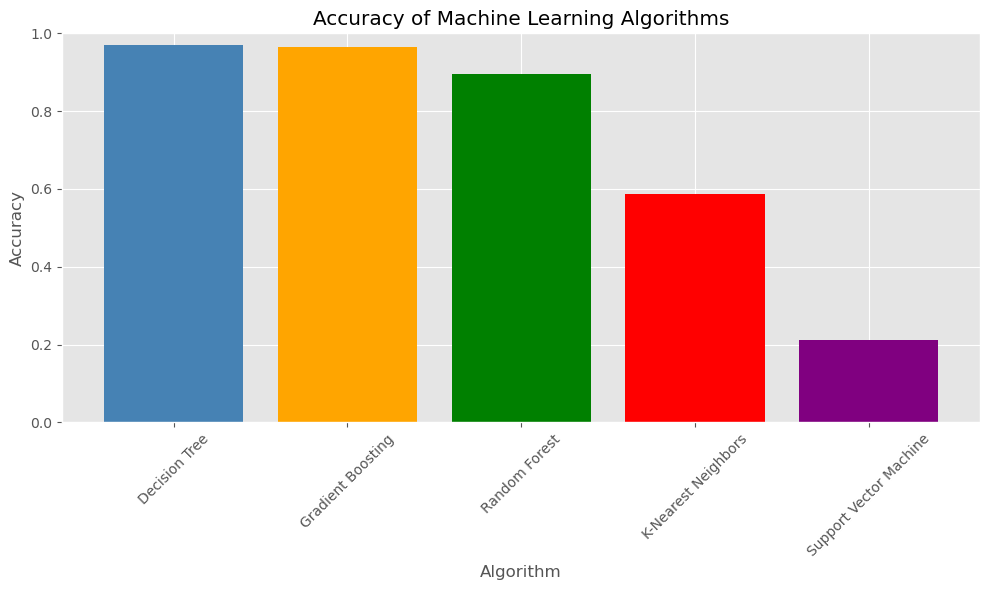

In [64]:
#Bar chart to compare accuracy of then different algorithms used

# Convert the results to a DataFrame for easier plotting
results_df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy'])

# Sort the results by accuracy in descending order
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Define custom colors for the bars
colors = ['steelblue', 'orange', 'green', 'red', 'purple']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(results_df['Algorithm'], results_df['Accuracy'], color=colors)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Algorithms')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()



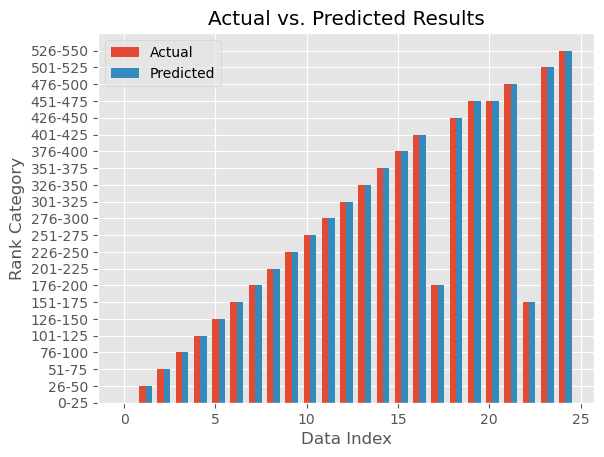

In [65]:
#bar chart showing actual vs predicted results for 25 rows

y_test = np.array(y_test[:25])  # Extract the first 25 actual results
y_pred = np.array(y_pred[:25])  # Extract the first 25 predicted results

# Define the desired order of the y-axis categories
category_order = [
    '0-25', '26-50', '51-75', '76-100', '101-125',
    '126-150', '151-175', '176-200', '201-225', '226-250',
    '251-275', '276-300', '301-325', '326-350', '351-375',
    '376-400', '401-425', '426-450', '451-475', '476-500',
    '501-525', '526-550', '551-575', '576-600', '601-625',
    '626-650', '651-675', '676-700', '701-725', '726-750',
    '751-775', '776-800', '801-825', '826-850', '851-875',
    '876-900', '901-925', '926-950', '951-975', '976-1000',
    '1001-1025', '1026-1050', '1051-1075', '1076-1100', '1101-1125',
    '1126-1150', '1151-1175', '1176-1200', '1201-1225', '1226-1250',
    '1251-1275', '1276-1300', '1301-1325', '1326-1350', '1351-1375'
]

# Create an array for x-axis values
x = np.arange(len(y_test))

# Set the width of the bars
bar_width = 0.35

# Create the bar chart
fig, ax = plt.subplots()
actual_bars = ax.bar(x, y_test, bar_width, label='Actual')
predicted_bars = ax.bar(x + bar_width, y_pred, bar_width, label='Predicted')

# Add labels, title, and legend
ax.set_xlabel('Data Index')
ax.set_ylabel('Rank Category')
ax.set_title('Actual vs. Predicted Results')

# Set the y-axis tick labels in the desired order
ax.set_yticklabels(category_order)

ax.legend()

# Show the plot
plt.show()


